In [54]:
%matplotlib inline
import os
import numpy as np
import stuff
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.spatial import KDTree
from scipy.stats import ks_2samp

In [31]:
# Load simulation
sim_r = stuff.parse_stuff_list(os.path.expanduser('~/Work/Projects/sextractor-litmus/data/sim09/sim09_r.list'))
sim_r_mag = np.append(sim_r[0].mag, sim_r[1].mag)

In [12]:
# KDTrees
sim_r_kdtree, sim_r_nstars, sim_r_ngalaxies = stuff.index_sources(sim_r[0], sim_r[1])

In [13]:
# Load Sex2 output
ref_r = Table.read(os.path.expanduser('~/Work/Projects/sextractor-litmus/data/sim09/ref/sim09_r_reference.fits'))

In [14]:
# Load Sex++ output
sexout = Table.read('/tmp/sextractorxx/tests/single_frame/test_coadded.py/output.fits')

In [35]:
# Calculate closest to the refererences
ref_r_closest = stuff.get_closest(ref_r, sim_r_kdtree, alpha='ALPHA_SKY', delta='DELTA_SKY')
ref_star_filter = (ref_r_closest['source'] < sim_r_nstarss)
ref_galaxy_filter = (ref_r_closest['source'] >= sim_r_nstars)

# And to the sex++ output
sex_r_closest = stuff.get_closest(sexout, sim_r_kdtree)

sex_star_filter = (sex_r_closest['source'] < sim_r_nstars)
sex_galaxy_filter = (sex_r_closest['source'] >= sim_r_nstars)

In [32]:
# Calculate errors for reference
ref_r_err = ref_r['MAG_AUTO'][ref_r_closest['catalog']] - sim_r_mag[ref_r_closest['source']]

In [33]:
# Calculate errors for sex++
sex_r_err = sexout['auto_mag'][sex_r_closest['catalog']] - sim_r_mag[sex_r_closest['source']]

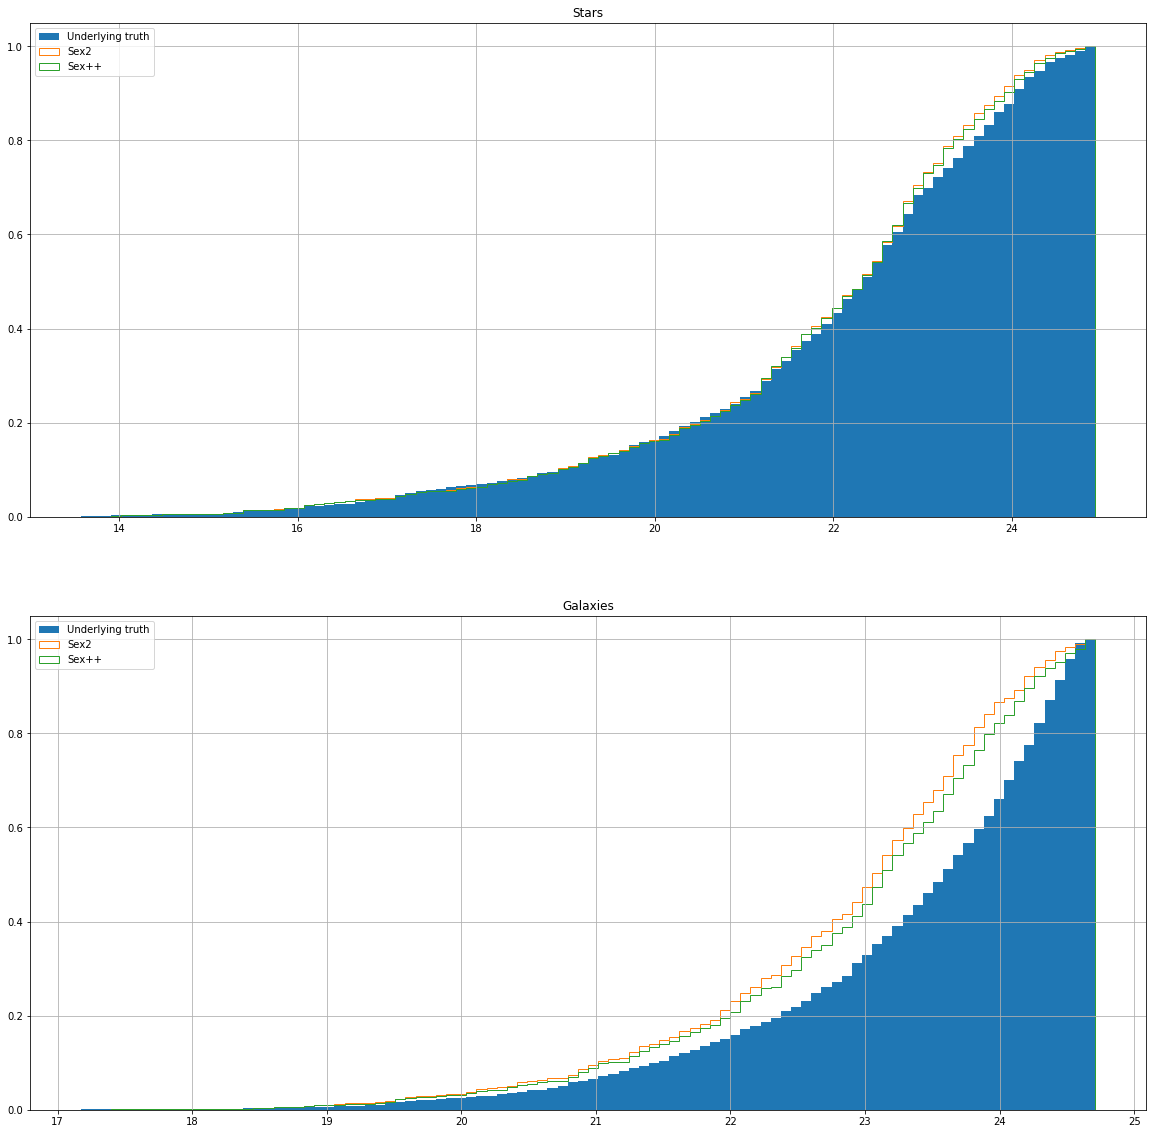

In [52]:
# Plot histograms
BINS=100

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Stars')
_, r_bins, _ = ax1.hist(
    sim_r[0].mag, bins=BINS,
    density=True, cumulative=True,
    label='Underlying truth'
)
ax1.hist(
    ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_star_filter]],
    density=True, cumulative=True,
    bins=r_bins, histtype='step',
    label='Sex2'
)
ax1.hist(
    sexout['auto_mag'][sex_r_closest['catalog'][sex_star_filter]],
    density=True, cumulative=True,
    bins=r_bins, histtype='step',
    label='Sex++'
)
ax1.grid(True)
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.set_title('Galaxies')
_, r_bins, _ = ax2.hist(
    sim_r[1].mag, bins=BINS,
    density=True, cumulative=True,
    label='Underlying truth'
)
ax2.hist(
    ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_galaxy_filter]],
    density=True, cumulative=True,
    bins=r_bins, histtype='step',
    label='Sex2'
)
ax2.hist(
    sexout['auto_mag'][sex_r_closest['catalog'][sex_galaxy_filter]],
    density=True, cumulative=True,
    bins=r_bins, histtype='step',
    label='Sex++'
)
ax2.grid(True)
ax2.legend()

_ = _

In [59]:
print(
    ks_2samp(
        ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_galaxy_filter]],
        sexout['auto_mag'][sex_r_closest['catalog'][sex_galaxy_filter]]
    ).pvalue
)
print(
    ks_2samp(
        sim_r[1].mag,
        sexout['auto_mag'][sex_r_closest['catalog'][sex_galaxy_filter]]
    ).pvalue
)
print(
    ks_2samp(
        sim_r[1].mag,
        ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_galaxy_filter]],
    ).pvalue
)

0.08581834001146958
3.2318708847871098e-06
1.1775446422238826e-12


In [61]:
print(
    ks_2samp(
        ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_star_filter]],
        sexout['auto_mag'][sex_r_closest['catalog'][sex_star_filter]]
    ).pvalue
)
print(
    ks_2samp(
        sim_r[0].mag,
        sexout['auto_mag'][sex_r_closest['catalog'][sex_star_filter]]
    ).pvalue
)
print(
    ks_2samp(
        sim_r[0].mag,
        ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_star_filter]],
    ).pvalue
)

0.8751137933167096
0.940588400689483
0.25523518513476406


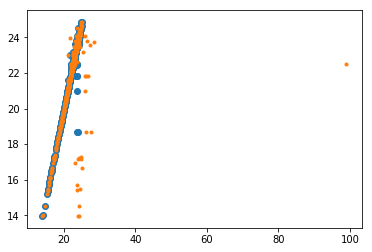

In [71]:
plt.figure()
plt.scatter(ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_star_filter]], sim_r_mag[ref_r_closest['source'][ref_star_filter]])
plt.scatter(sexout['auto_mag'][sex_r_closest['catalog'][sex_star_filter]], sim_r_mag[sex_r_closest['source'][sex_star_filter]], marker='.')

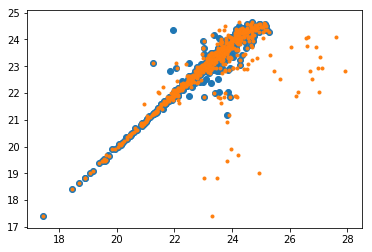

In [74]:
plt.figure()
plt.scatter(ref_r['MAG_AUTO'][ref_r_closest['catalog'][ref_galaxy_filter]], sim_r_mag[ref_r_closest['source'][ref_galaxy_filter]])
plt.scatter(sexout['auto_mag'][sex_r_closest['catalog'][sex_galaxy_filter]], sim_r_mag[sex_r_closest['source'][sex_galaxy_filter]], marker='.')